# Import Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khaledabdallah","key":"676e156a60f3f033c3f9c6630b671551"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl

# **Download Dataset**

In [ ]:
!kaggle datasets download -d laotse/credit-risk-dataset

100% 368k/368k [00:00<00:00, 549kB/s]
100% 368k/368k [00:00<00:00, 549kB/s]


In [ ]:
! unzip credit-risk-dataset.zip

Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


In [ ]:
#importing datasets
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
#checking data distrubution across each columns
df.count()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

In [ ]:
#handling null values is a primary step, handling null values helps model predict more accurately
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df['person_emp_length'].mean(), df['person_emp_length'].median(), df['person_emp_length'].mode()

(4.789686296787225,
 4.0,
 0    0.0
 Name: person_emp_length, dtype: float64)

In [ ]:
df['loan_int_rate'].mean(), df['loan_int_rate'].median(), df['loan_int_rate'].mode()

(11.011694892245036,
 10.99,
 0    7.51
 Name: loan_int_rate, dtype: float64)

In [ ]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [ ]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
#Getting unique values on the data
for col in df.columns:
    print(f"{col} - {df[col].nunique()}")

person_age - 58
person_income - 4295
person_home_ownership - 4
person_emp_length - 36
loan_intent - 6
loan_grade - 7
loan_amnt - 753
loan_int_rate - 348
loan_status - 2
loan_percent_income - 77
cb_person_default_on_file - 2
cb_person_cred_hist_length - 29


In [ ]:
#this helps in checking columns type and dimensions, a vital step to do with any dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
#converting person income column to float, just for the sake of our analysis
df['person_income'] = df['person_income'].astype(float)

In [ ]:
#describe gives us a birds eye view of the data, we can check the value concentration
# and also we can observe the data spread which is good to locate outliers.
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


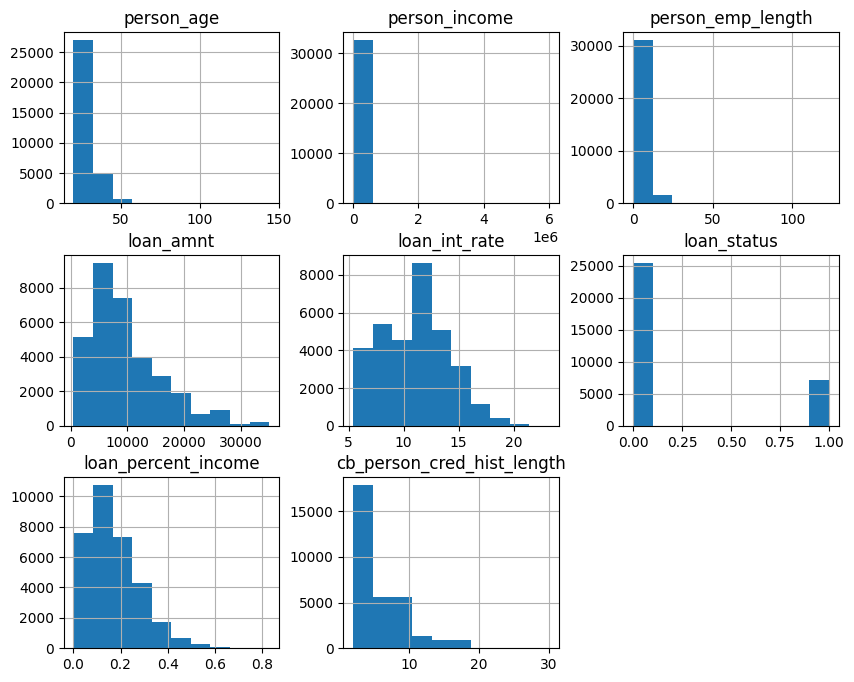

In [ ]:
# Histograms for numerical columns.

df.hist(figsize=(10, 8))
plt.show()


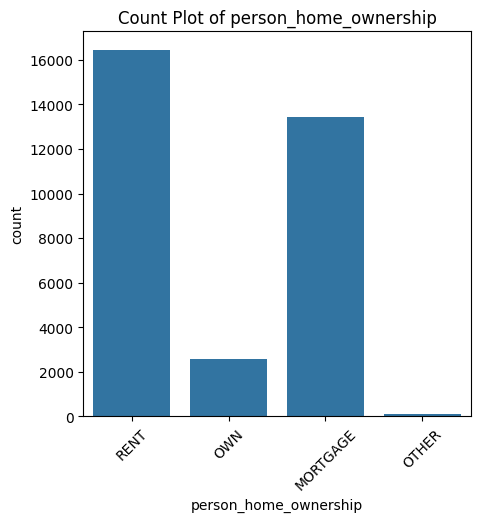

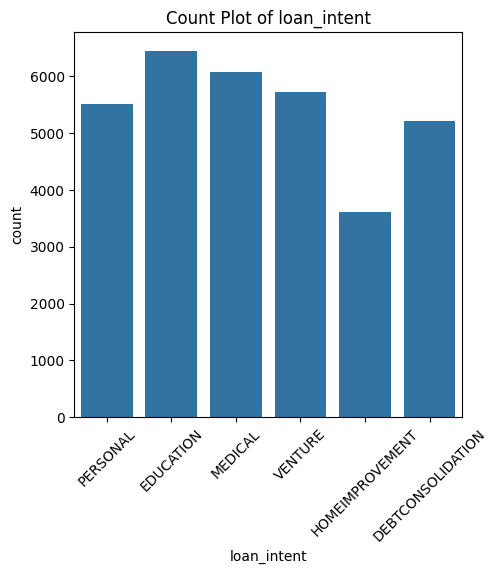

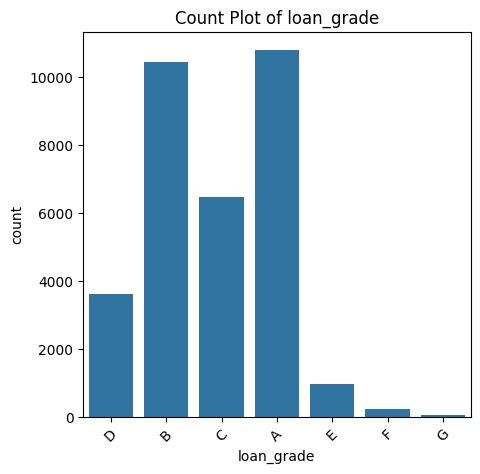

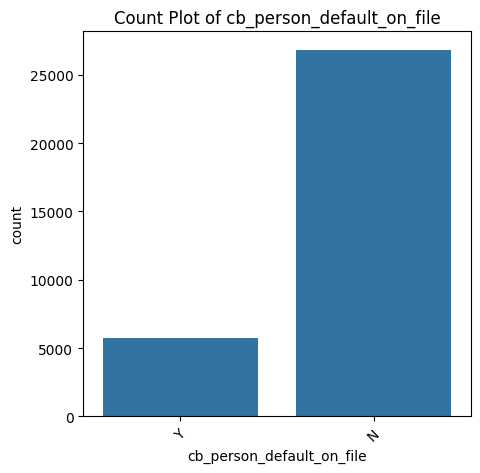

In [ ]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# **Encoding is a very important step, it basically converts categorical to numeric, machine requires a data to be in numeric format to process it.**

In [ ]:
# First, encode categorical features, use one hot encoding here
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent','loan_grade', 'cb_person_default_on_file'])

In [ ]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000.0,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600.0,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600.0,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500.0,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400.0,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_encoded = df_encoded.astype(int)

# **Model Training**



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Dropping dependant variable/target variable from the original data and adding it to another dataset.
# Splitting data to train and test datasets for model training, testing, predicting and evaluation purpose
X ,y = df_encoded.drop('loan_status', axis = 1), df['loan_status']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 50, random_state = 42)

model_rf.fit(train_X, train_y)
y_pred = model_rf.predict(test_X)

print('Model Accuracy ',"{:.2%}".format(accuracy_score(test_y, y_pred)))
print('Model F1 Score ',"{:.2%}".format(f1_score(test_y, y_pred)))
print('Model Precision ',"{:.2%}".format(precision_score(test_y, y_pred)))
print('Model Recall ',"{:.2%}".format(recall_score(test_y, y_pred)))

Model Accuracy  92.36%
Model F1 Score  79.77%
Model Precision  92.90%
Model Recall  69.89%


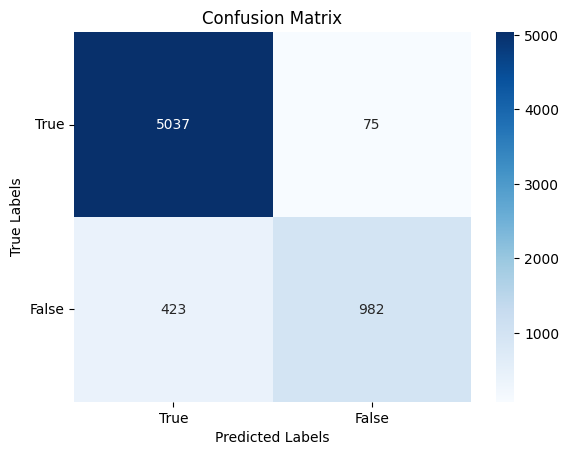

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define labels for the confusion matrix
labels = ['True Positive','True Negative','False Positive','False Negative']

# Calculate the confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(test_y, model_rf.predict(test_X))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['True', 'False'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'False'], rotation=0)
plt.show()
